# Convert CRY files to RGB

Convert cry files to rgb arrays that we can use to create and extract images.

In [1]:
CRY_RGB = [
[
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [34,34,34,34,34,34,34,34,34,34,34,34,34,34,19,0],
    [68,68,68,68,68,68,68,68,68,68,68,68,64,43,21,0],
    [102,102,102,102,102,102,102,102,102,102,102,95,71,47,23,0],
    [135,135,135,135,135,135,135,135,135,135,135,104,78,52,26,0],
    [169,169,169,169,169,169,169,169,169,170,141,113,85,56,28,0],
    [203,203,203,203,203,203,203,203,203,203,153,122,91,61,30,0],
    [237,237,237,237,237,237,237,237,230,197,164,131,98,65,32,0],
    [255,255,255,255,255,255,255,255,247,214,181,148,115,82,49,17],
    [255,255,255,255,255,255,255,255,255,235,204,173,143,112,81,51],
    [255,255,255,255,255,255,255,255,255,255,227,198,170,141,113, 85],
    [255,255,255,255,255,255,255,255,255,255,249,223,197,171,145,119],
    [255,255,255,255,255,255,255,255,255,255,255,248,224,200,177,153],
    [255,255,255,255,255,255,255,255,255,255,255,255,252,230,208,187],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,240,221],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]
    ],
[
    [0,17,34,51,68,85,102,119,136,153,170,187,204,221,238,255],
    [0,19,38,57,77,96,115,134,154,173,192,211,231,250,255,255],
    [0,21,43,64,86,107,129,150,172,193,215,236,255,255,255,255],
    [0,23,47,71,95,119,142,166,190,214,238,255,255,255,255,255],
    [0,26,52,78,104,130,156,182,208,234,255,255,255,255,255,255],
    [0,28,56,85,113,141,170,198,226,255,255,255,255,255,255,255],
    [0,30,61,91,133,153,183,214,244,255,255,255,255,255,255,255],
    [0,32,65,98,131,164,197,230,255,255,255,255,255,255,255,255],
    [0,32,65,98,131,164,197,230,255,255,255,255,255,255,255,255],
    [0,30,61,91,133,153,183,214,244,255,255,255,255,255,255,255],
    [0,28,56,85,113,141,170,198,226,255,255,255,255,255,255,255],
    [0,26,52,78,104,130,156,182,208,234,255,255,255,255,255,255],
    [0,23,47,71,95,119,142,166,190,214,238,255,255,255,255,255],
    [0,21,43,64,86,107,129,150,172,193,215,236,255,255,255,255],
    [0,19,38,57,77,96,115,134,154,173,192,211,231,250,255,255],
    [0,17,34,51,68,85,102,119,136,153,170,187,204,221,238,255]
],
[
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,240,221],
    [255,255,255,255,255,255,255,255,255,255,255,255,252,230,208,187],
    [255,255,255,255,255,255,255,255,255,255,255,248,224,200,177,153],
    [255,255,255,255,255,255,255,255,255,255,249,223,197,171,145,119],
    [255,255,255,255,255,255,255,255,255,255,227,198,170,141,113,85],
    [255,255,255,255,255,255,255,255,255,235,204,173,143,112,81,51],
    [255,255,255,255,255,255,255,255,247,214,181,148,115,82,49,17],
    [237,237,237,237,237,237,237,237,230,197,164,131,98,65,32,0],
    [203,203,203,203,203,203,203,203,203,203,153,122,91,61,30,0],
    [169,169,169,169,169,169,169,169,169,170,141,113,85,56,28,0],
    [135,135,135,135,135,135,135,135,135,135,135,104,78,52,26,0],
    [102,102,102,102,102,102,102,102,102,102,102,95,71,47,23,0],
    [68,68,68,68,68,68,68,68,68,68,68,68,64,43,21,0],
    [34,34,34,34,34,34,34,34,34,34,34,34,34,34,19,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]
]

In [2]:
import math
from PIL import Image, ImageColor
import numpy as np

def saturate(c,intensity):
    # Modify them using the intensity value
    c = c * (intensity / 255.0)
    c = math.ceil(c+0.5)
    # Clamp the value between 0 and 255
    return max(0, min(c,255))
    
def cry_to_rgb(d):
    # For example value of d: 0x1A20
    intensity = d & 0xFF   # get the intensity: 0x20
    cr1 = (d >> 12) & 0xF  # get index 1: 0x0A (10)
    cr2 = (d >> 8) & 0xF   # get index 2: 0x01 (1)
    
    # Use the indices to get the RGB values from our
    # lookup table
    r = CRY_RGB[0][cr1][cr2]
    g = CRY_RGB[1][cr1][cr2]
    b = CRY_RGB[2][cr1][cr2]

    # Ensure we get a valid rgb value between 0 and 255
    r1 = saturate(r, intensity)
    g1 = saturate(g, intensity)
    b1 = saturate(b, intensity)

    return (r1,g1,b1)

def getPixels(file_name):
    cry_pixels = open(file_name,'rb').read()
    rgb_pixels = []
    for i in range(0, len(cry_pixels),2):
        t = cry_pixels[i:i+2]
        #print(i,t,int.from_bytes(t,'little'))
        rgb = cry_to_rgb(int.from_bytes(t,'big'))
        rgb_pixels += [rgb]
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels

In [332]:
width = 320
for i in range(3,9):
    pixels = getPixels(f'cry/beasty{i}.cry')
    img = Image.fromarray(pixels,mode='RGB')
    img.save(f'cry-output/beasty{i}.png')

In [338]:
width = 320
pixels = getPixels('cry/beasty4.cry')
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * 4, img.height * 4), Image.NEAREST)
img.save('cry-output/claw.png')

In [325]:
rgb_pixels = []
for p in range(0,0xFFFF+1):
    rgb = cry_to_rgb(p)
    rgb_pixels += [rgb]
print(len(rgb_pixels), len(set(rgb_pixels)))


65536 63762


In [326]:
width=256
rgb_pixels = []
for p in range(0,0xFFFF+1):
    rgb = cry_to_rgb(p)
    rgb_pixels += [rgb]
pixels = np.array(rgb_pixels).astype(np.uint8)
pixels.shape = (-1,width,3)

img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)
img.save('cry-output/band.png')

In [327]:
from collections import Counter
rgb_count = Counter(rgb_pixels)
rgb_pixels_unique = [(255,255,255) if rgb_count[p] > 1 else p 
                     for p in rgb_pixels]
pixels = np.array(rgb_pixels_unique).astype(np.uint8)
pixels.shape = (-1,width,3)

img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)
img.save('cry-output/band-missing.png')

In [328]:

def createSquare():
    width=16
    height=16
    img = Image.new( 'RGB', (width,height), "black")
    pixels = img.load()
    for y in range(0,height):
        for x in range(0,width):
            r = CRY_RGB[0][x][y]
            g = CRY_RGB[1][x][y]
            b = CRY_RGB[2][x][y]
            pixels[x, height-1-y] = (r,g,b)
    return img
img = createSquare()
img = img.resize((img.width * 48, img.height * 48), Image.NEAREST)
img.save('cry-output/2dcube.png')

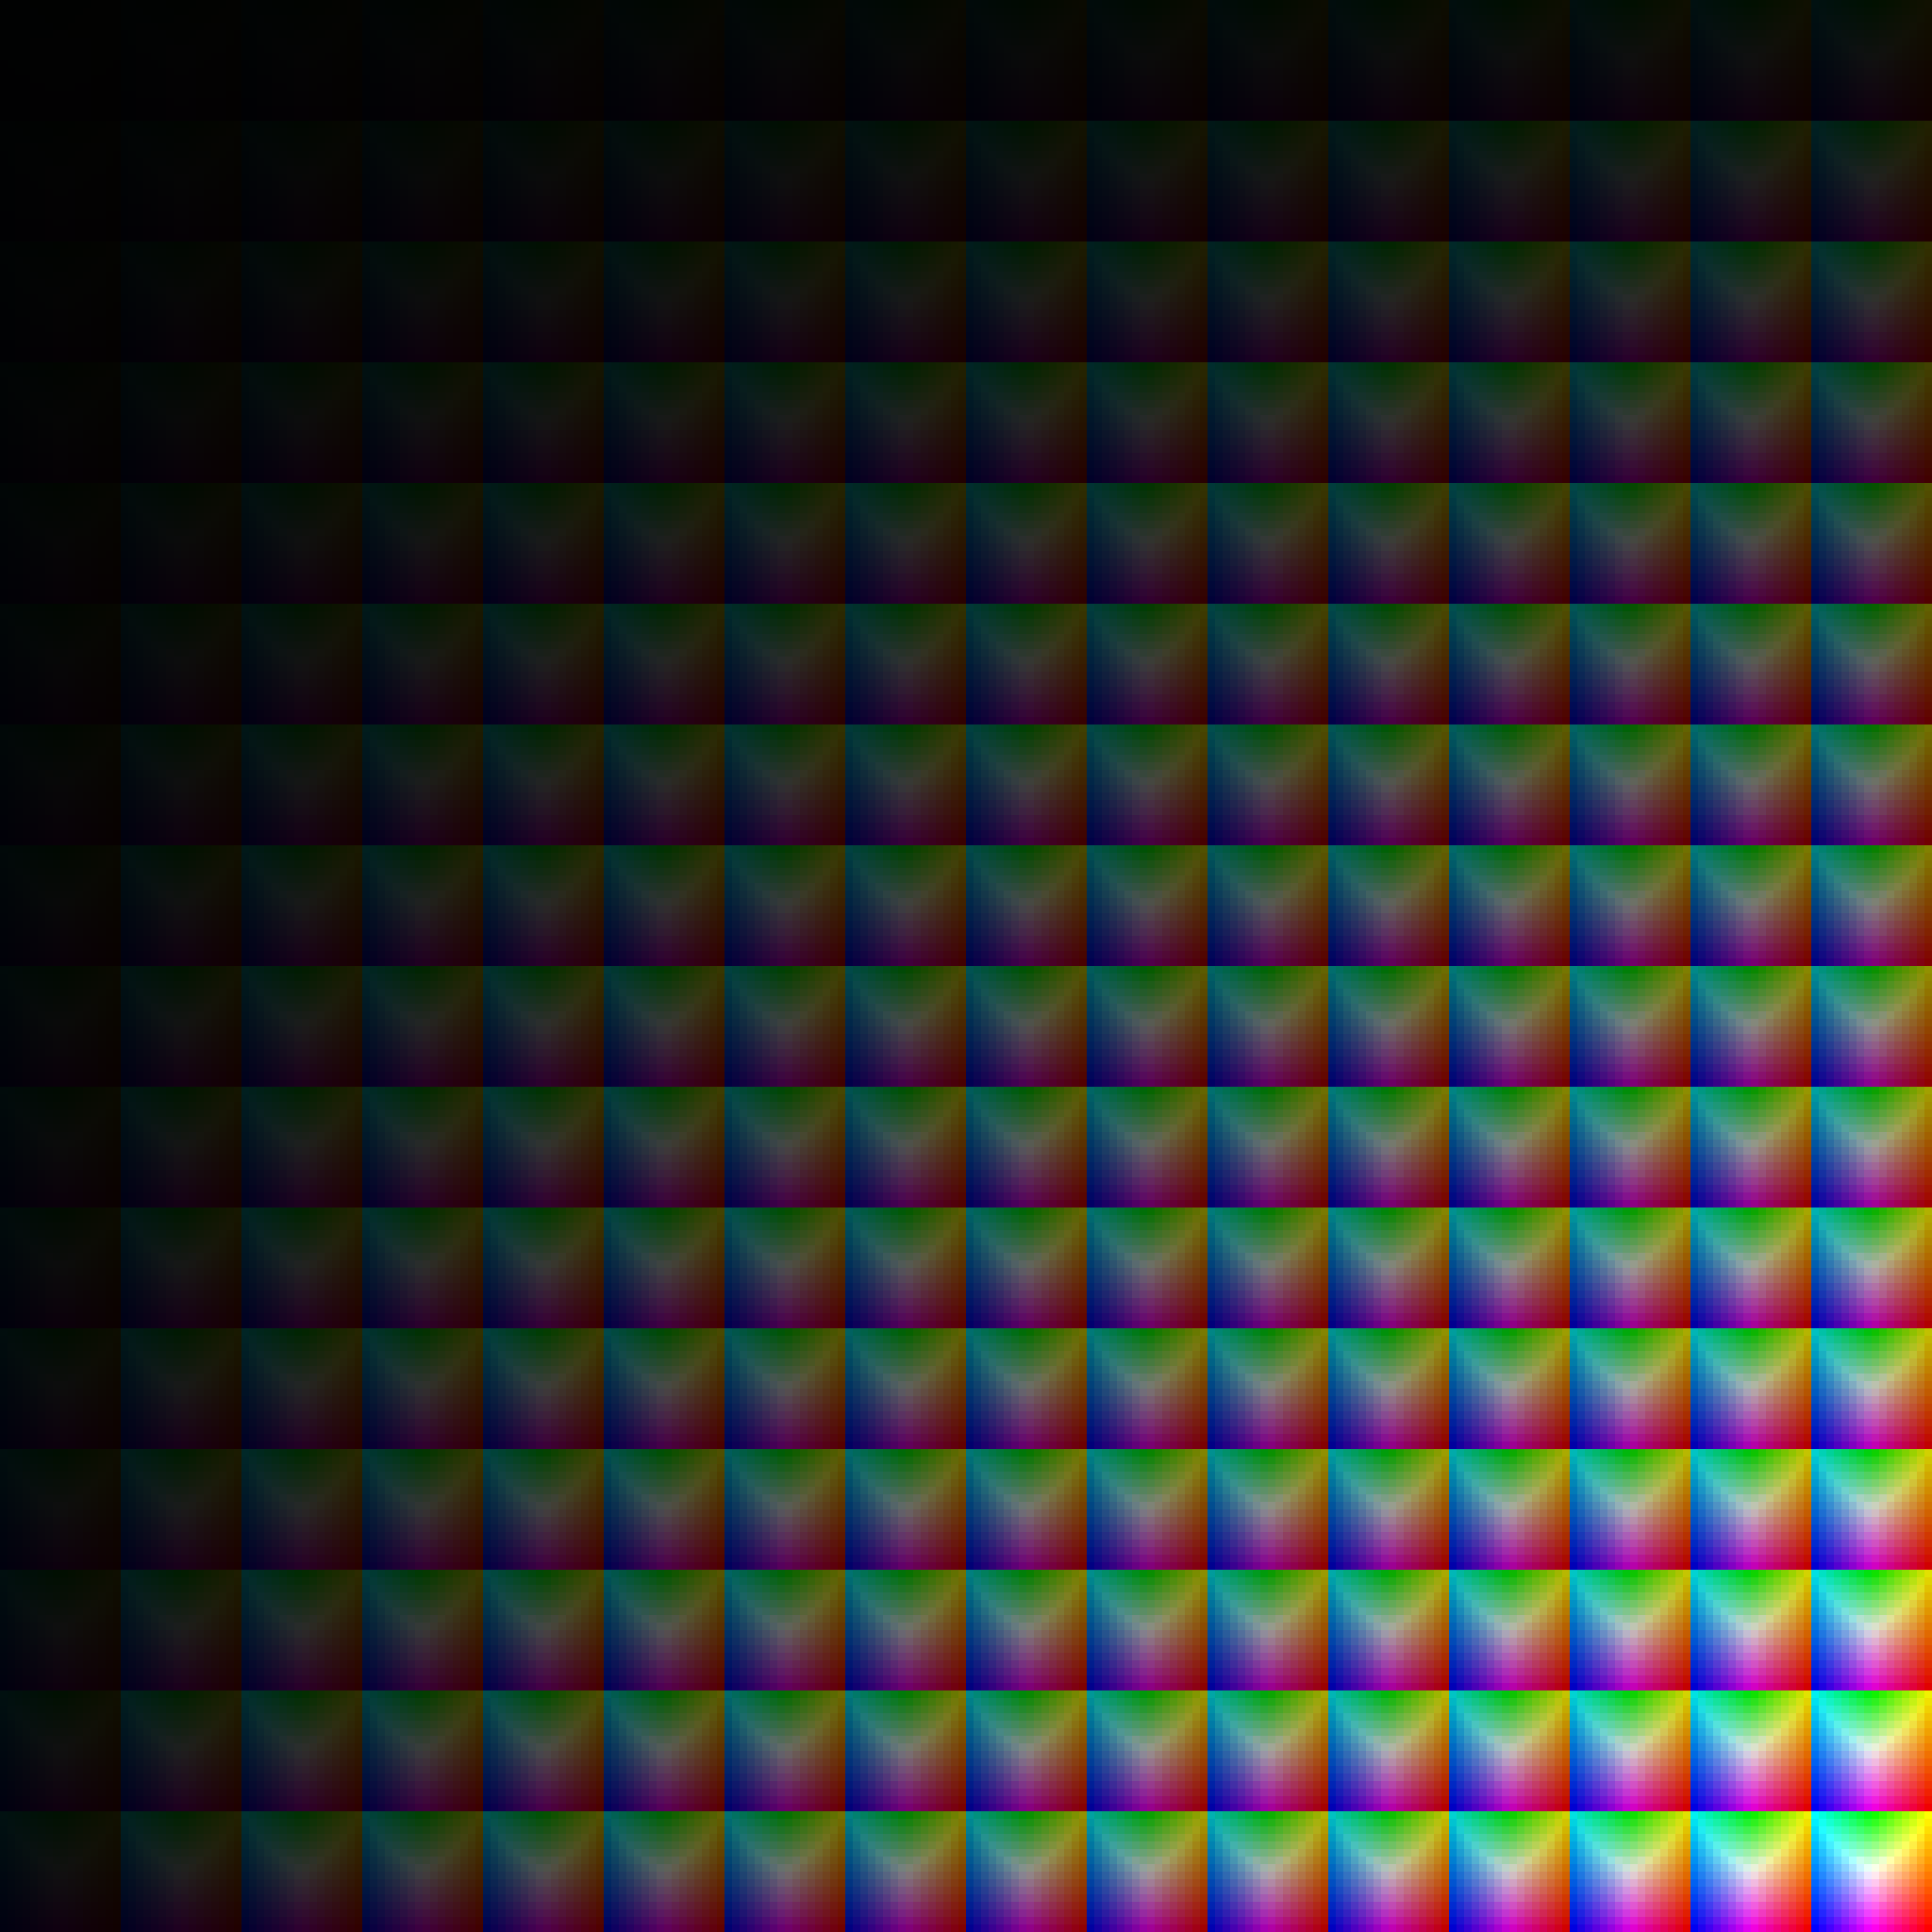

In [329]:
width=16
height=16

def createCube(intensity):
    img = Image.new( 'RGB', (width,height), "white")
    pixels = img.load()
    for y in range(0,height):
        for x in range(0,width):
            r = saturate(CRY_RGB[0][x][y], intensity)
            g = saturate(CRY_RGB[1][x][y], intensity)
            b = saturate(CRY_RGB[2][x][y], intensity)
            pixels[x, height-1-y] = (r,g,b)
    return img

img = Image.new( 'RGB', (width*16,height*16), "black")
for y in range(0,height):
    for x in range(0,width):
        cube = createCube((x+1)*(y+1))
        img.paste(cube, (x*width, y*height))
img = img.resize((img.width * 8, img.height * 8), Image.NEAREST)
img.save('cry-output/2dcube-intensity.png')
img

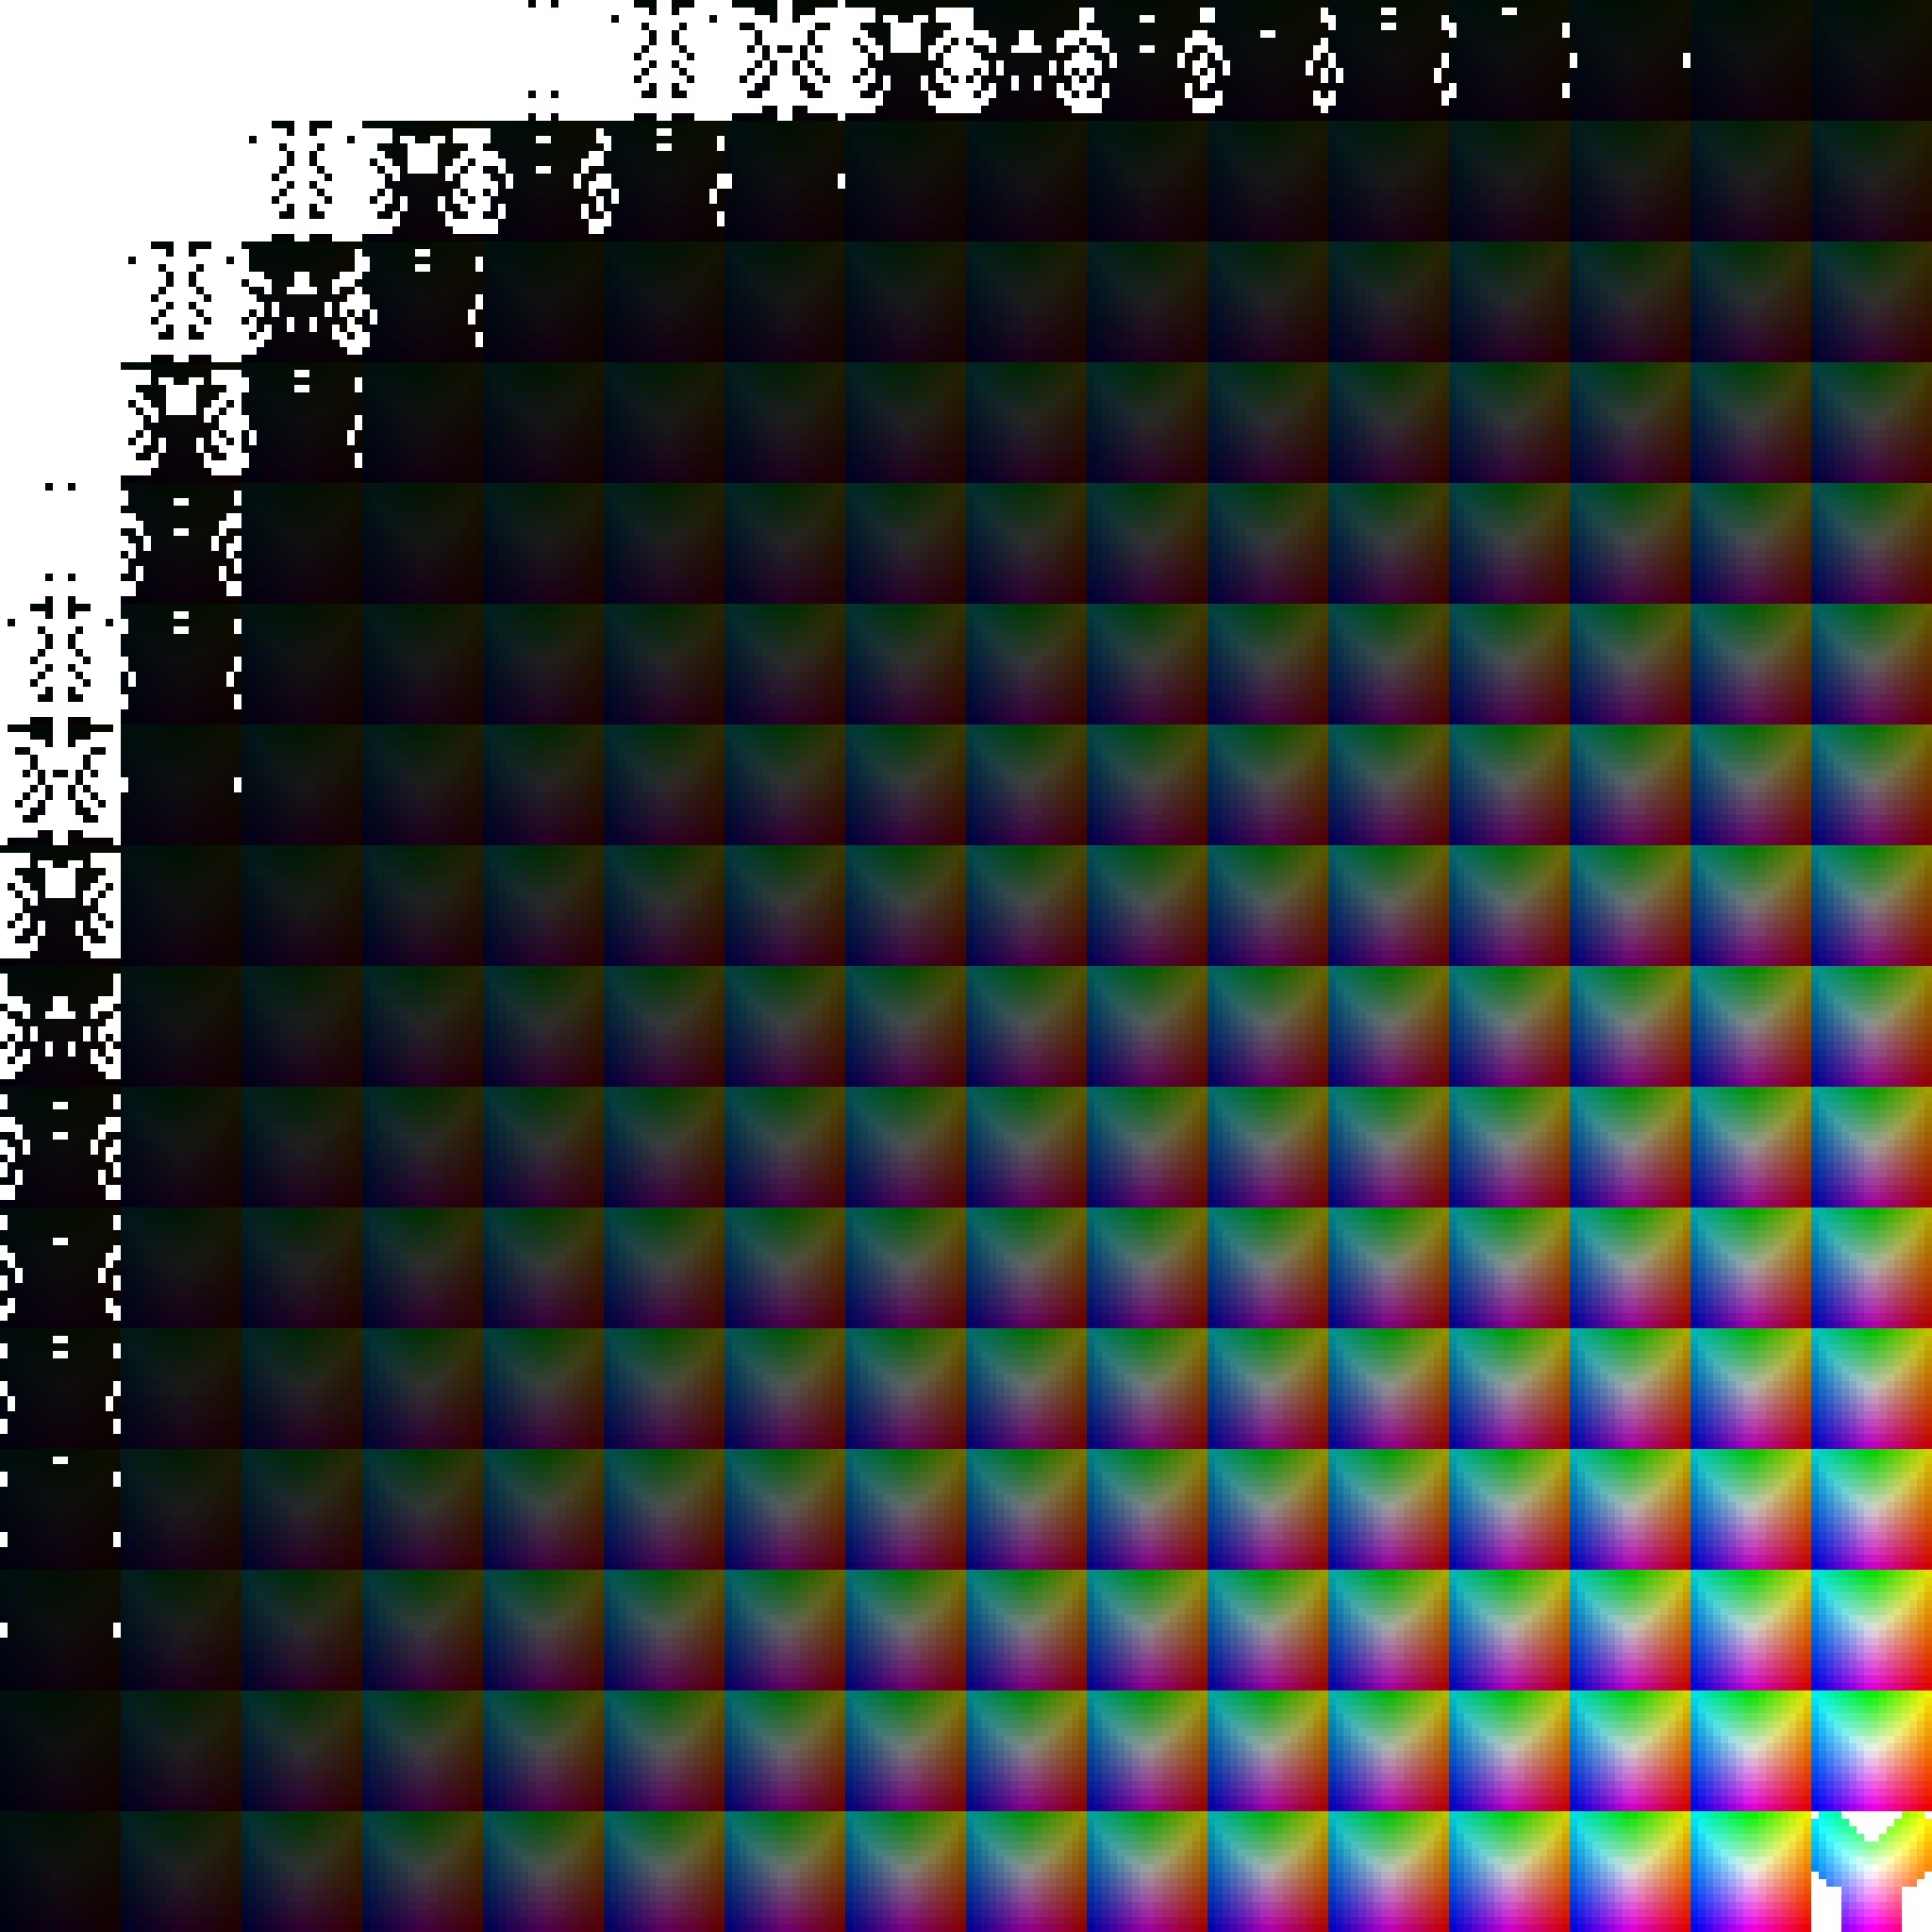

In [330]:
width=16
height=16

def createCube(intensity):
    img = Image.new( 'RGB', (width,height), "white")
    pixels = img.load()
    for y in range(0,height):
        for x in range(0,width):
            r = saturate(CRY_RGB[0][x][y], intensity)
            g = saturate(CRY_RGB[1][x][y], intensity)
            b = saturate(CRY_RGB[2][x][y], intensity)
            if rgb_count[(r,g,b)] > 1:
                continue
            pixels[x, height-1-y] = (r,g,b)
    return img

img = Image.new( 'RGB', (width*16,height*16), "black")
for y in range(0,height):
    for x in range(0,width):
        cube = createCube((x+1)*(y+1))
        img.paste(cube, (x*width, y*height))
img = img.resize((img.width * 8, img.height * 8), Image.NEAREST)
img.save('cry-output/2dcube-intensity-missing.png')
img

## Try to Create a Cube

In [302]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import LightSource

In [303]:
import numpy as np
import io

plt.rcParams["figure.figsize"] = (80,80)
plt.rcParams['figure.dpi'] = 80

def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

def createVoxelData(screens):
    # prepare some coordinates
    width = len(screens[0][0])
    height = len (screens[0])
    x, y, z = np.indices((width,height,len(screens)))
    voxelarray = np.zeros((width,height,len(screens)), dtype=bool)
    colorarray = np.empty(voxelarray.shape, dtype=object)
    for zp,screen in enumerate(screens):
        for yp, row in enumerate(screen):
            for xp, col in enumerate(row):
                cube = (x == xp) & (y == yp) & (z == zp)
                voxelarray |= cube
                color = col
                colorarray[cube] = color

    # upscale the above voxel image, leaving gaps
    filled_2 = explode(voxelarray)
    ecolors_2 = explode(colorarray)

    # Shrink the gaps
    x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
    x[0::2, :, :] += 0.10
    y[:, 0::2, :] += 0.10
    z[:, :, 0::2] += 0.10
    x[1::2, :, :] += 0.90
    y[:, 1::2, :] += 0.90
    z[:, :, 1::2] += 0.90

    return ((x,y,z), filled_2, ecolors_2)

def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img


In [304]:
screens = []
top = 16
bottom = 0
for z in range(0,8):
    s = []
    for y in range(0,8):
        row = []
        for x in range(0,8):
            r,g,b = 0,0,0
            row += [f"#{r:02x}{g:02x}{b:02x}c0"]
        s+=[row]
    screens+=[s]

    

In [279]:
img = createSquare()
img_pixels = list(img.getdata())
[img_pixels[i:i+16] for i in range(0,len(img_pixels),16)][-8:]

[[(0, 119, 255),
  (34, 134, 255),
  (68, 150, 255),
  (102, 166, 255),
  (135, 182, 255),
  (169, 198, 255),
  (203, 214, 255),
  (237, 230, 255),
  (255, 230, 237),
  (255, 214, 203),
  (255, 198, 169),
  (255, 182, 135),
  (255, 166, 102),
  (255, 150, 68),
  (255, 134, 34),
  (255, 119, 0)],
 [(0, 102, 255),
  (34, 115, 255),
  (68, 129, 255),
  (102, 142, 255),
  (135, 156, 255),
  (169, 170, 255),
  (203, 183, 255),
  (237, 197, 255),
  (255, 197, 237),
  (255, 183, 203),
  (255, 170, 169),
  (255, 156, 135),
  (255, 142, 102),
  (255, 129, 68),
  (255, 115, 34),
  (255, 102, 0)],
 [(0, 85, 255),
  (34, 96, 255),
  (68, 107, 255),
  (102, 119, 255),
  (135, 130, 255),
  (169, 141, 255),
  (203, 153, 255),
  (237, 164, 255),
  (255, 164, 237),
  (255, 153, 203),
  (255, 141, 169),
  (255, 130, 135),
  (255, 119, 102),
  (255, 107, 68),
  (255, 96, 34),
  (255, 85, 0)],
 [(0, 68, 255),
  (34, 77, 255),
  (68, 86, 255),
  (102, 95, 255),
  (135, 104, 255),
  (169, 113, 255),
  (203,

In [305]:
x=0
g= 0
b = 255
inc = 0
for y in range(0,8):
    r = 0
    g1 = g
    for z in range(0,8):
        r = min(255, r+34)
        g1 = min(255, g1+inc)
        screens[z][y][x] = f"#{r:02x}{g1:02x}{b:02x}c0"
    g+=17
    inc+=2

z=7
g= 255
for y in range(7,-1,-1):
    r = 255
    b = 255
    for x in range(0,8):
        g = max(0, g-2)
        b = max(0, b-34)
        screens[z][y][x] = f"#{r:02x}{g:02x}{b:02x}c0"
    g-=17

y=7
g= 255
for z in range(6,-1,-1):
    r = 255
    b = 255
    for x in range(1,8):
        r = max(0, r-20)
        b = max(0, b-34)
        screens[z][y][x] = f"#{r:02x}{g:02x}{b:02x}c0"
    g-=2


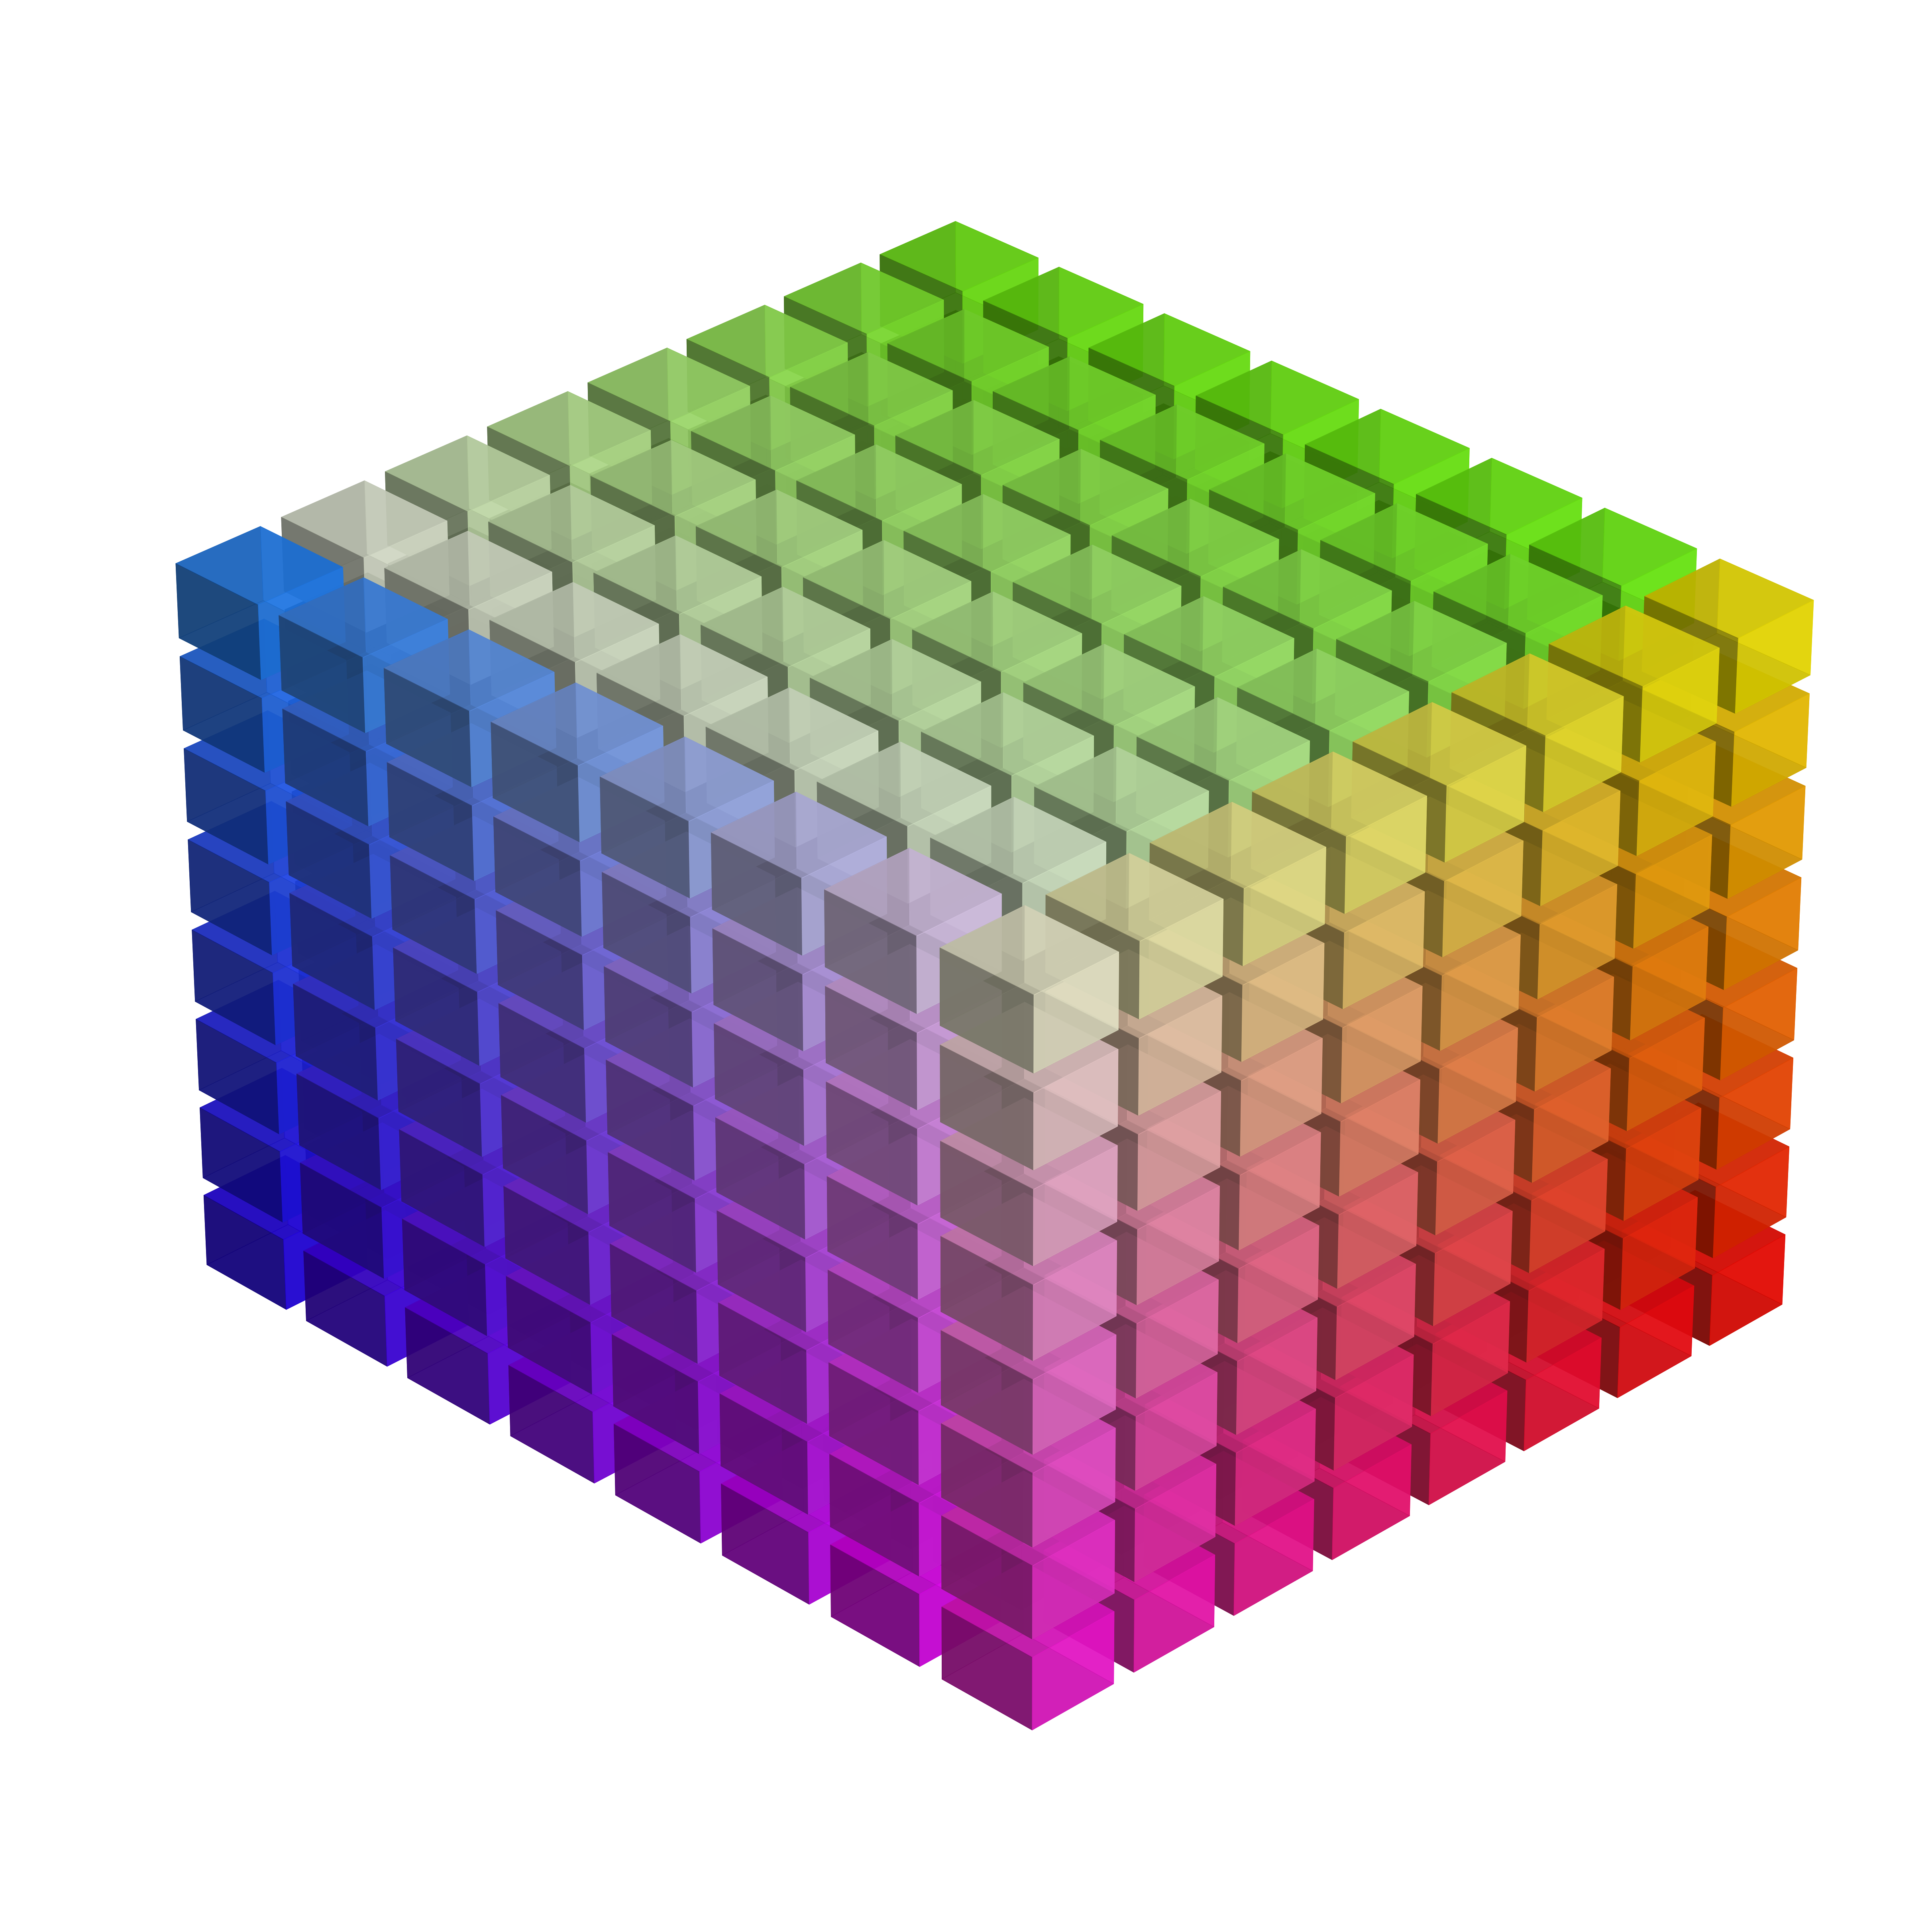

In [307]:
((x,y,z), voxels, vcolors) = createVoxelData(screens)

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ls = LightSource(45)
ax.voxels(x,y,z,voxels, facecolors=vcolors, edgecolors=vcolors,lightsource=ls)
ax.axis('off')
ax.view_init(azim=-45, vertical_axis='y')
img = fig2img(plt.gcf())

newImage = []
for item in img.getdata():
    if item[:3] == (255, 255, 255):
        newImage.append((255, 255, 255, 0))
    else:
        newImage.append(item)
img.putdata(newImage)
img.save('cry-output/cube.png')



## beasty3.cry header is truncated

In [17]:
def getPixelsFromBytes(cry_pixels):
    rgb_pixels = []
    for i in range(0, len(cry_pixels),2):
        t = cry_pixels[i:i+2]
        #print(i,t,int.from_bytes(t,'little'))
        rgb = cry_to_rgb(int.from_bytes(t,'big'))
        rgb_pixels += [rgb]
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels

In [24]:
"""
; beasty3-trunc.cry
  pic          EQU $820000
  ; beasty4.cry
  pic2         EQU pic+$1f400
  ; beasty5.cry
  pic3         EQU pic2+$1f400
  ; beasty6.cry
  pic4         EQU pic3+$25800
  ; beasty7.cry
  pic5         EQU pic4+(640*128)
  ; beasty8.cry
  pic6         EQU pic5+(640*200)
"""
b3 = 0x20090-144
b4 = b3 + 0x1f400
b5 = b4 + 0x1f400
b6 = b5 + 0x25800
b7 = b6 + (640*128)
b8 = b7 + (640*128)


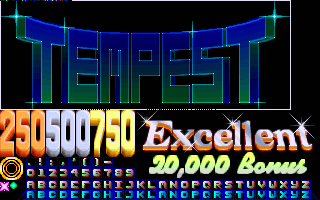

In [25]:
width = 320
t2k_jag = open("../tempest2k/orig/t2k.jag",'rb')
t2k_jag.seek(b3)
b3_bytes = t2k_jag.read(b4-b3)
pixels = getPixelsFromBytes(b3_bytes)
img = Image.fromarray(pixels,mode='RGB')
img